In [137]:
import torch
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from datetime import datetime

### 1. Datapreperation ###

In [32]:
# Dataset of movie reviews
dataset = pd.read_csv('../data/IMDB-Dataset.csv')

In [33]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
#cut down dataset
dataset = dataset.iloc[:500, :]
dataset['sentiment'].value_counts()

sentiment
negative    263
positive    237
Name: count, dtype: int64

In [ ]:
#encode sentiment values
dataset['sentiment'] = dataset['sentiment'].replace({'positive':1 , 'negative':0})

In [36]:
#clean texts
sentences = dataset['review'].to_list()
sentences = [re.sub(r"<br\s*/?>", " ", sentence) for sentence in sentences]

### 2. Generate and print Embeddings ###

In [ ]:
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer

#define bert models
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")
st_model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
bert_embeddings = []

# generate bert embeddings
for sentence in sentences:
    inputs = bert_tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)
    outputs = bert_model(**inputs)
    
    embeddings = torch.mean(outputs.last_hidden_state, dim=1)
    bert_embeddings.append(embeddings.view(-1).detach().numpy())

bert_embeddings = np.array(bert_embeddings)

# generate Sentence Transformers Embeddings
st_model = SentenceTransformer("all-MiniLM-L6-v2")
st_embeddings = st_model.encode(sentences)

In [ ]:
#print the shape of the embeddings
print(f'Shape of Bert embeddings: {bert_embeddings.shape}')
print(f'Shape of MiniLM-L6 embeddings: {st_embeddings.shape}')

Shape of Bert embeddings: (500, 768)
Shape of MiniLM-L6 embeddings: (500, 384)


In [ ]:
print(bert_embeddings[0])

[ 3.57227288e-02 -1.48017570e-01  2.65599579e-01 -7.85527974e-02
  1.92490265e-01 -1.61113158e-01  9.38072726e-02  6.20948792e-01
  7.42609799e-02 -1.19819090e-01  1.28545225e-01 -4.62117136e-01
 -3.90209794e-01  4.23932195e-01  5.49338982e-02  6.32409036e-01
  3.07096899e-01 -9.09233019e-02 -2.37181142e-01  2.85997808e-01
  3.79968256e-01  1.60998821e-01  5.21858335e-02  6.67585135e-01
  3.13652903e-01  5.79433441e-02 -7.47767240e-02 -1.52574688e-01
 -2.95152396e-01 -1.42535701e-01  6.96681440e-01 -9.02597010e-02
 -3.46484542e-01 -2.09110990e-01  1.19267724e-01 -1.99864358e-01
 -1.80189878e-01 -1.56443104e-01  1.60149872e-01 -5.57165407e-03
 -5.98108709e-01 -2.41458669e-01  1.63524598e-02 -9.70400870e-02
 -2.28755832e-01 -1.65653855e-01  5.00494421e-01 -3.36851031e-02
  2.35375855e-02 -1.22073321e-02 -2.84022510e-01  1.17778510e-01
  1.16570778e-01 -1.29103407e-01  4.55235571e-01  6.11175835e-01
 -2.94979870e-01 -3.12337130e-01 -4.65080231e-01 -1.75708562e-01
  3.37417334e-01 -2.68049

In [42]:
print(st_embeddings[0])

[ 2.83524264e-02  5.83332367e-02 -6.98866248e-02  6.82884902e-02
  8.02171603e-02  6.91656545e-02  4.09349836e-02  2.41006389e-02
  7.36916214e-02 -6.02146275e-02 -1.77530255e-02 -3.98259833e-02
 -3.91299985e-02  3.74947563e-02 -5.28748669e-02  1.16289603e-02
  8.97124782e-02 -1.11945622e-01 -8.30249265e-02  7.75647089e-02
 -1.72473807e-02  9.49578651e-04  1.11974873e-01 -1.58161316e-02
 -1.59431845e-02  5.85859120e-02  6.05842564e-03  4.20996770e-02
 -1.95173249e-02 -3.10252123e-02  2.93781310e-02  1.93674341e-02
  4.75997739e-02  1.36941168e-02 -3.97008620e-02 -1.09474018e-01
  7.05459416e-02  3.26211825e-02  3.99561748e-02 -1.25219123e-02
  2.79508345e-02  7.30480924e-02 -8.12257454e-03 -1.69576202e-02
 -6.60540164e-02 -6.92291781e-02  2.28029713e-02  4.71017770e-02
 -3.04365233e-02 -6.16387501e-02  2.87595224e-02 -4.66397032e-03
  7.18192291e-03 -2.19091345e-02 -1.23539548e-02 -3.99805494e-02
  3.78372818e-02  8.58064648e-03 -4.63249832e-02 -1.87219921e-02
  6.78516477e-02 -3.92314

### 3. Visualization of Embeddings ###

In [ ]:
from sklearn.manifold import TSNE

# reduce dimensions
tsne = TSNE(n_components=2,perplexity=40, learning_rate=500, n_iter=1000)

bert_embeddings_2d = tsne.fit_transform(bert_embeddings)
st_embeddings_2d = tsne.fit_transform(st_embeddings)

print(bert_embeddings_2d.shape)
print(st_embeddings_2d.shape)

(500, 2)
(500, 2)


In [ ]:
# define plotting function for scatterplots

positive_mask = dataset['sentiment'].to_numpy().astype(bool)

def scatter_plot(embeddings, name):

    # positive sentiment scatter
    plt.scatter(
        embeddings.T[0][positive_mask],
        embeddings.T[1][positive_mask],
        color='green',
        alpha=0.5,
        label='Positive Sentiment',
        s=25
    )
    #add mean value
    plt.scatter(
        np.mean(embeddings[positive_mask], axis=0)[0],
        np.mean(embeddings[positive_mask], axis=0)[1],
        color='green',
        marker='X',
        s=200
    )


    # negative sentiment scatter
    plt.scatter(
        embeddings.T[0][~positive_mask],
        embeddings.T[1][~positive_mask],
        color='red',
        alpha=0.5,
        label='Negative Sentiment',
        s=25
    )
    # add mean value
    plt.scatter(
        np.mean(embeddings[~positive_mask], axis=0)[0],
        np.mean(embeddings[~positive_mask], axis=0)[1],
        color='red',
        marker='X',
        s=200
    )

    # increas visibility and readibility
    plt.xlabel("Dimension 1", fontsize=12)
    plt.ylabel("Dimension 2", fontsize=12)
    plt.title(f"2D Visualization of {name} Embeddings by Sentiment", fontsize=14)

    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.show()

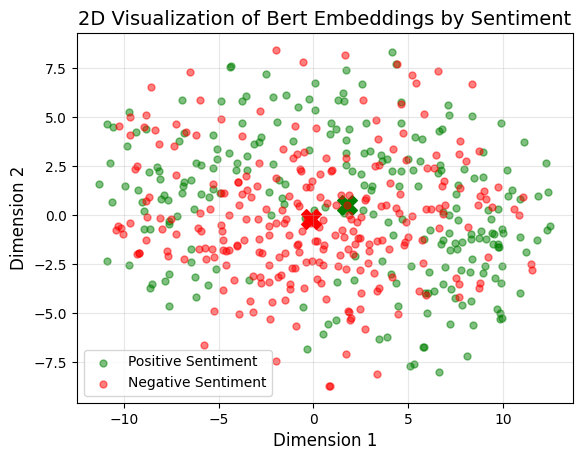

In [67]:
scatter_plot(bert_embeddings_2d, name='Bert')

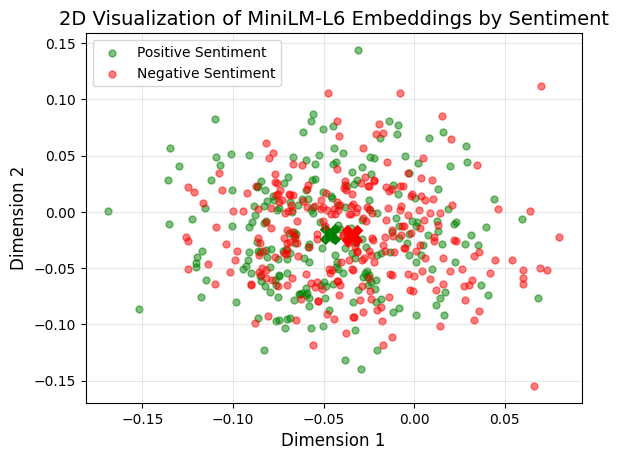

In [68]:
scatter_plot(st_embeddings, name='MiniLM-L6')

### 4. Compute and plot similarity metrics ###

In [ ]:

#euclidean distance
euclidean_bert = np.linalg.norm(
    bert_embeddings[:8, None, :] - bert_embeddings[None, :8, :], axis=2
)
euclidean_st = np.linalg.norm(
    st_embeddings[:8, None, :] - st_embeddings[None, :8, :], axis=2
)

#cosine similarities
norms = np.linalg.norm(bert_embeddings[:8], axis=1, keepdims=True) 
normalized_embeddings = bert_embeddings[:8] / norms  

cosine_similarity_bert = np.dot(normalized_embeddings, normalized_embeddings.T)  

norms = np.linalg.norm(st_embeddings[:8], axis=1, keepdims=True) 
normalized_embeddings = st_embeddings[:8] / norms  

cosine_similarity_st = np.dot(normalized_embeddings, normalized_embeddings.T)  

In [ ]:
# define dunction for metric heatmaps

sentiment_labels = dataset.iloc[:8, 1].replace({0:'N', 1:'P'})

def metric_heatmap(matrix, modelname, metricname):
    # Create heatmap
    sns.heatmap(matrix, annot=True, cmap="coolwarm", xticklabels=sentiment_labels, yticklabels=sentiment_labels)

    plt.title(f"Heatmap of {metricname} for {modelname} embeddings")
    plt.xlabel("Sentiment")
    plt.ylabel("Sentiment")
    plt.xticks(rotation=45)  
    plt.yticks(rotation=0)   
    plt.show()

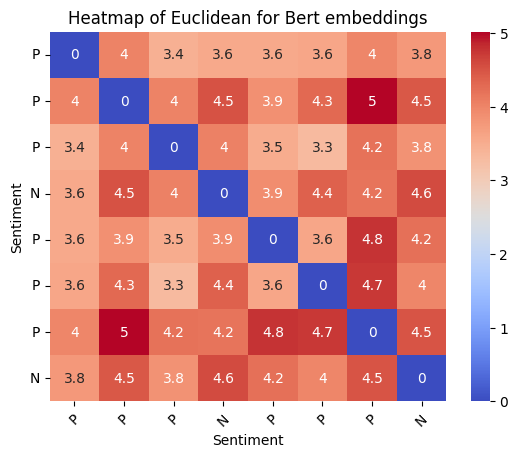

In [101]:
metric_heatmap(euclidean_bert, modelname='Bert', metricname='Euclidean')

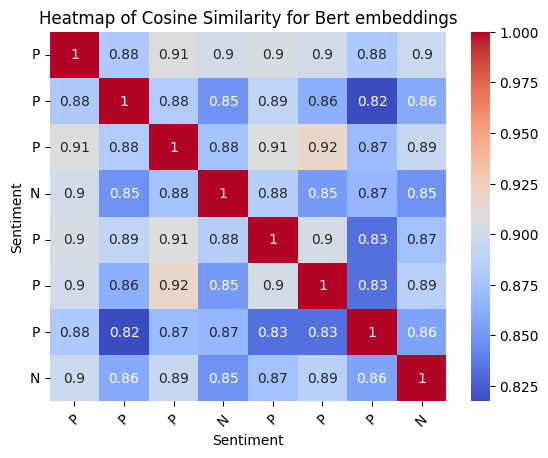

In [102]:
metric_heatmap(cosine_similarity_bert, modelname='Bert', metricname='Cosine Similarity')

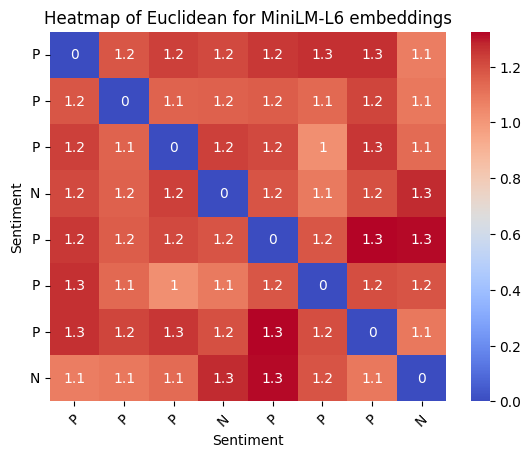

In [103]:
metric_heatmap(euclidean_st, modelname='MiniLM-L6', metricname='Euclidean')

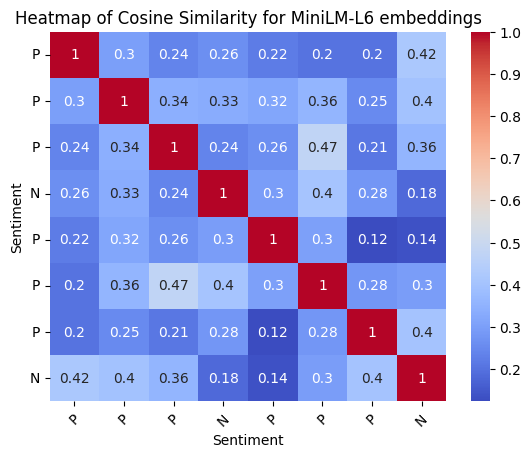

In [105]:
metric_heatmap(cosine_similarity_st, modelname='MiniLM-L6', metricname='Cosine Similarity')

### 5. Prompt for sentiment analysis ###

In [ ]:
from transformers import AutoModelForSequenceClassification

# get pretrained model for binary sentiment analysis
sentiment_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [ ]:
# make predictions 
batch = dataset.loc[:31, 'review'].tolist()

#tokenize batch
tokens = bert_tokenizer(batch, return_tensors='pt', padding=True, truncation=True)
tokens.pop('token_type_ids')

start_time = datetime.now()

#predict batch
with torch.no_grad():
    outputs = sentiment_model(**tokens)
end_time = datetime.now()

#print compuatation time
time_difference = end_time - start_time
print(f'computation time: {time_difference}')

computation time: 0:00:14.458092


In [159]:
logits = F.softmax(outputs.logits, dim=1)
preds = torch.argmax(logits, dim=1)

In [160]:
#cumpute accuracy
acc = np.mean(preds.numpy() == dataset.iloc[:32, 1].to_numpy())
print(f'Accuracy score: {acc}')

Accuracy score: 0.875


### 6. Quantization of a model ###

In [ ]:
#quantize model
quantized_sentiment_model = torch.quantization.quantize_dynamic(
    sentiment_model, {torch.nn.Linear}, dtype=torch.qint8)

print("Original Model Size:", sentiment_model.num_parameters())
print("Quantized Model Size:", quantized_sentiment_model.num_parameters())

Original Model Size: 66955010
Quantized Model Size: 23854080


In [ ]:
#make predictions with the quantized model
start_time = datetime.now()

with torch.no_grad():
    outputs = quantized_sentiment_model(**tokens)
end_time = datetime.now()

time_difference = end_time - start_time
print(f'computation time: {time_difference}')

logits = F.softmax(outputs.logits, dim=1)
preds = torch.argmax(logits, dim=1)

#compute accuracy
acc = np.mean(preds.numpy() == dataset.iloc[:32, 1].to_numpy())
print(f'Accuracy score: {acc}')

computation time: 0:00:10.826280
Accuracy score: 0.875
